# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
df = pd.read_csv(r'H:\1111\Analytical Database\real_estate_data.csv',sep='\t')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
df.isna().sum()  # Оценка количества пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
#df['locality_name'].unique()

In [5]:
#df.hist(figsize=(15, 20))

####  ВЫВОД:
При первичном знакомстве с данными мы видим отсутствие значений во многих столбцах, некорректные данных и их типы. Все это необходимо исправить в предобработке данных, до начала анализа

### Предобработка данных

+ Заполните пропущенные значения там, где это возможно. 
+ Укажите причины, которые могли привести к пропускам в данных.
+ Преобразуйте тип данных и поясните, почему нужно изменить.
+ Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты
+ Найдите и устраните редкие и выбивающиеся значения. 
+ Опишите, какие особенности в данных вы обнаружили.

In [6]:
# df.duplicated().sum() # Предвартельная проверка дубликатов

In [7]:
df.isna().mean().sort_values(ascending=False) # Оценка доли пропусков

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

In [8]:
stats = df.describe()  #  создаем таблицу для выявление анамальных значений методом квартилей

In [9]:
higth = stats.loc['50%'] + (stats.loc['75%'] - stats.loc['25%']) * 1.5   #  верхняя граница усов boxplot
low   = stats.loc['50%'] - (stats.loc['75%'] - stats.loc['25%']) * 1.5   #  нижняя граница усов boxplot
low[low < 0] = 0                                             #  значения не могут быть меньше нуля. корректируем

In [10]:
stats.loc['higth'] = higth
stats.loc['low'] = low
stats

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
higth,21.000000,9.750000e+06,96.850000,5.000000,3.070000,25.500000,65.550000,13.000000,16.600000,4.000000,54758.000000,23681.000000,1.500000,941.000000,2.500000,1154.500000,375.500000
low,0.000000,0.000000e+00,7.150000,0.000000,2.230000,0.000000,0.000000,0.000000,1.600000,0.000000,0.000000,2516.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Обрабатываем данные.

In [11]:
# df['airports_nearest']

In [12]:
df['airports_nearest'] = (df['airports_nearest'] / 1000).round()   # округление до км
# df['airports_nearest']

In [13]:
df['balcony'] = df['balcony'].fillna(0).astype(int)  # обнуление NaN, если неуказано количество балконов, то нет положительного
#df['balcony']                                       # влияния. Значит для нас это ноль.

In [14]:
# Высота потолков.
df['ceiling_height'].agg([max, min]) # определение размаха значений. Оценка качества данных. 

max    100.0
min      1.0
Name: ceiling_height, dtype: float64

<AxesSubplot:>

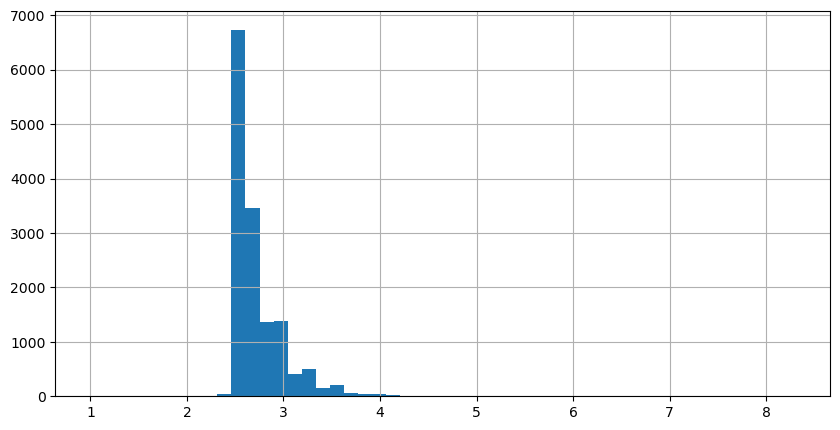

In [15]:
# общее представление данных 
df[df['ceiling_height'] <10]['ceiling_height'] .hist(bins=50, figsize=(10,5))

In [16]:
# корректировка высоты потолков
""""
df[df['ceiling_height'] < 2] = 0
df['ceiling_height'] = df['ceiling_height'].fillna(0)
df.loc[df['ceiling_height'] > 20] = df['ceiling_height']/10

df['ceiling_height'].value_counts()
df['ceiling_height'].sort_values()
""";


In [17]:
# корректировка высоты потолков (новый вариант)
ceiling = df['ceiling_height'].median()
df[df['ceiling_height'] < 2] = ceiling
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling)
df.loc[df['ceiling_height'] > 20] = df['ceiling_height']/10
#df['ceiling_height']

In [18]:
#df['ceiling_height'].hist(bins=100, figsize=(10,5))

In [19]:
#df[df['days_exposition'].isna()]   #  Оценка количества пропусков.

In [20]:
3176/23699 * 100  # доля ячеек без данных

13.401409342166337

Корректировка кол-во дней. Так как показатель скорости продажи является ключевым,
присвоение ему каких либо усредненых или нулевых значений считаю некорректным.
В 13,4% строк нет данных

In [21]:
#df['first_day_exposition']

In [22]:
# коррекция даты. Перевод в формат DateTime и округление до дней. Необходимо для удобства расчетов.
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S').dt.round('d')
#df['first_day_exposition'].agg([min, max])

In [23]:
# коррекция кол-ва этажей. 
df['floors_total'] = df['floors_total'].fillna(0).astype(int)

Так как мы не можем обоснованно  присвоить им категорию первых, либо последних этажей,
обнуляем. В дальнейшем они получат категорию прочих и не будут учавствовать в оценке.

In [24]:
# коррекция апартаментов. Меняем формат столбца object на формат значений в этом столбце bool.
df['is_apartment'] = df['is_apartment'].fillna(0)
df['is_apartment'] = df['is_apartment'].astype(bool)
df['is_apartment'].value_counts()

False    23627
True        72
Name: is_apartment, dtype: int64

Так если в объявлении нет прямого указания на наличие апартаментов, значит влияния на привлекательность нет.

In [25]:
# коррекция данных площадь кухни
kitch_total = (df['kitchen_area'] / df['total_area']).median() 
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['total_area'] * kitch_total

Условно считаем соотношение кухни к общей площади примерно постоянным.

Данные даются с 1970 года. В таблице отсортированой по году публикации по возрастанию, первые строки содержат некорректные данные. Так как для целей исследования старые года неактульны,удаляем их из таблицы

In [26]:
a = (df[df['first_day_exposition'] < '2010']['first_day_exposition'].count() / df['first_day_exposition'].count() * 100).round(1)
print('Доля строк для удаления ', a,'%')

Доля строк для удаления  0.1 %


In [27]:
# Доля удаляемых строк незначительна(0,1 % ). Удаляем.
df = df[df['first_day_exposition'] > '2010']
#df.sort_values('first_day_exposition')

In [28]:
#df['last_price'].sort_values()

Условно считаем соотношение жилой к общей площади примерно постоянным.

In [29]:
# корректировка данных о жилой площади по среднему соотношению жилой к общей
liv_total = (df['living_area'] / df['total_area']).median() 
df.loc[df['living_area'].isna(), 'living_area'] = df['total_area'] * liv_total
#df['living_area'].isna().sum()

Заменяем неявный дубликат. Полностью удаляем строки с пропусками значений, так как будем оценивать показатели именно по населеным пунктам.Строки без названия, для целей нашего исследования будут лишними.

In [30]:
# корректировка названий населенных пунктов
a = len(df['locality_name'].unique())
df = df.dropna(subset=['locality_name'])

df['locality_name'] = df['locality_name'].str.replace('посёлок', 'поселок')
b = len(df['locality_name'].unique())
print('Нашли и удалили', a-b, 'неявных дубликатов')

Нашли и удалили 35 неявных дубликатов


In [31]:
df['locality_name'].isna().sum()

0

In [32]:
#df['locality_name'].unique()

#### ВЫВОД:
    В процессе предобработки данных заменили строковый формат на дату, убрали строки с пустыми значения, которые не повлияют на дальнешие расчеты. Пропущенные значения в значениях площади заменили медианнымиб обработали неявные дубликаты. Теперь можно производить анализ.

### Посчитайте и добавьте в таблицу новые столбцы

In [33]:
df['price_metr'] = (df['last_price'] / df['total_area']).astype(int) # цена квадратного метра
df['weekday'] = df['first_day_exposition'].dt.dayofweek  # день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
df['month'] = df['first_day_exposition'].dt.month           # месяц публикации объявления
df['year'] = df['first_day_exposition'].dt.to_period("Y")   # год публикации объявления

df['typefloor'] = 'другой'                             # тип этажа квартиры (значения — «первый», «последний», «другой»)
df['typefloor'] = df['typefloor'].where(df['floor'] != df['floors_total'],'последний')
df['typefloor'] = df['typefloor'].where(df['floor'] != 1,'первый')


df['center'] = (df['cityCenters_nearest'] / 1000).round(0)  # расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

### Проведите исследовательский анализ данных

(0.0, 6.0)

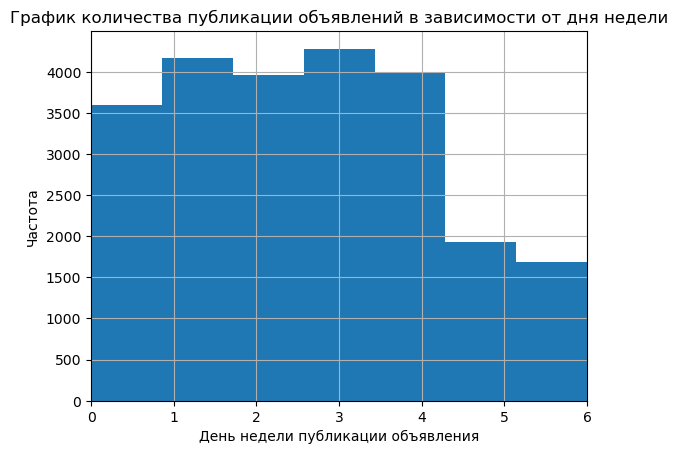

In [34]:
# день публикации объявления
df['weekday'].hist(bins=7)
plt.title('График количества публикации объявлений в зависимости от дня недели')
plt.xlabel('День недели публикации объявления')
plt.ylabel('Частота')
plt.xlim(0, 6)

+ Активность подачи объявлений в будни в два раза выше. Отсюда вывод, что большинство объявлений дается профессиональными риэлторами, которые в сб и вс обычно отдыхают.

Text(0, 0.5, 'Частота')

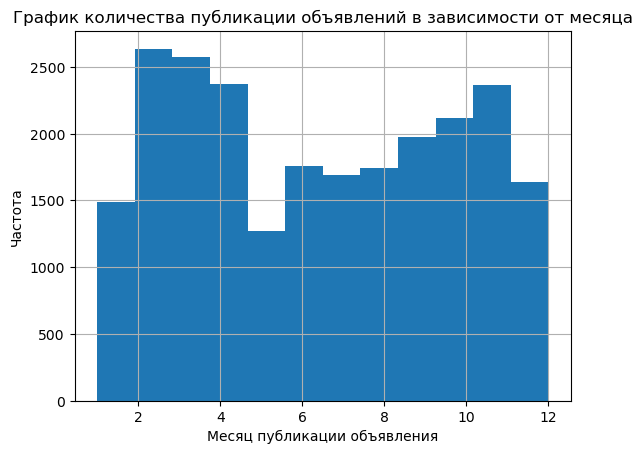

In [35]:
# месяц публикации объявления
df['month'].hist(bins=12)
plt.title('График количества публикации объявлений в зависимости от месяца')
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Частота')
#plt.xlim(0, 12)

Активность подачи объявлений в январе и мае почти в два раза меньше. Отсюда вывод, что большинство объявлений дается профессиональными риэлторами, которые в сб и вс обычно отдыхают.

(1.0, 50.0)

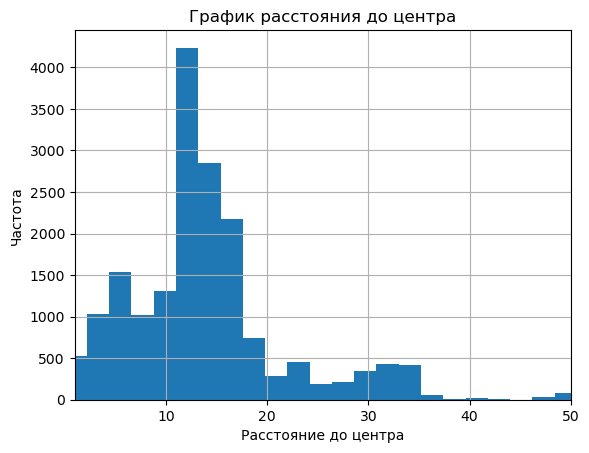

In [36]:
# расстояние до центра города в метрах
df['center'].hist(bins=30)
plt.title('График расстояния до центра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Частота')
plt.xlim(1, 50)

+ Распределение нормальное со смещением к центру города, с пиком в районе 12-13 км и небольшим пиком на 5км, очевидно нахождение там крупных жилых комплексов;
+ Тренд явный. Основная масса квартир расположена на растоянии до 18 км; 


Text(0, 0.5, 'Частота')

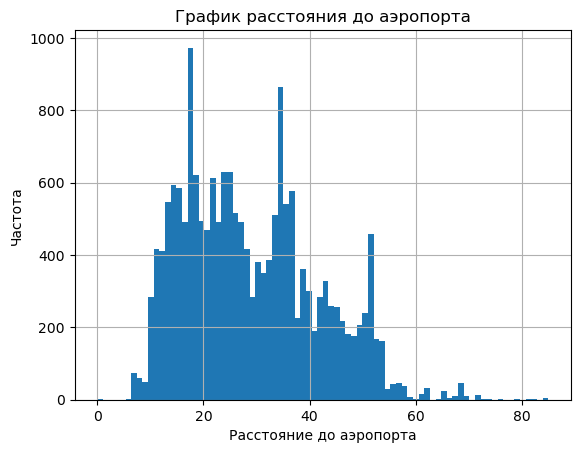

In [37]:
# расстояние до ближайшего аэропорта
df['airports_nearest'].hist(bins=80)
plt.title('График расстояния до аэропорта')
plt.xlabel('Расстояние до аэропорта')
plt.ylabel('Частота')
#plt.xlim(1, 50)

+ Распределение нормальное, с пиками в районе 18 км, 35км и 52км, очевидно это среднее растояние от крупных жилых комплексов, оюнаруженных в прошлом иследовании;

Text(0, 0.5, 'Частота')

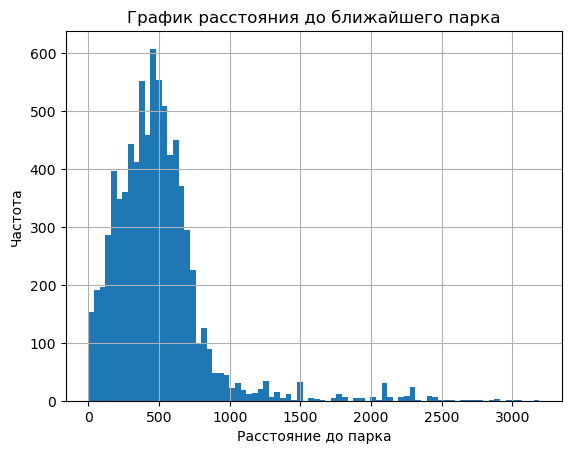

In [38]:
# расстояние до ближайшего парка
df['parks_nearest'].hist(bins=80)
plt.title('График расстояния до ближайшего парка')
plt.xlabel('Расстояние до парка')
plt.ylabel('Частота')
#plt.xlim(1, 1000)

+ Данные распределены нормально ;
+ Тренд стабилен;
+ В большенстве случаев растояние не превышает 700 м;
+ Можно говорить о хорошей парковой инфраструктуре;

(1.0, 30.0)

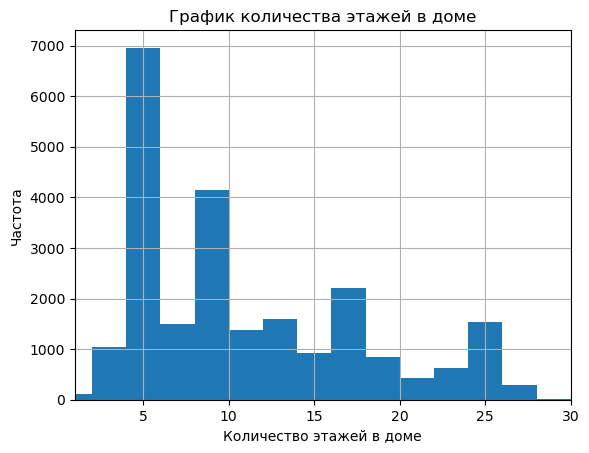

In [39]:
# общее количество этажей в доме
df['floors_total'].hist(bins=30)
plt.title('График количества этажей в доме')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Частота')
plt.xlim(1, 30)

+ Из графика наглядно видно присутствие типовых застроек: 5, 9-10 этажных домов, другая этажность встречается гораздо реже.

(1.0, 30.0)

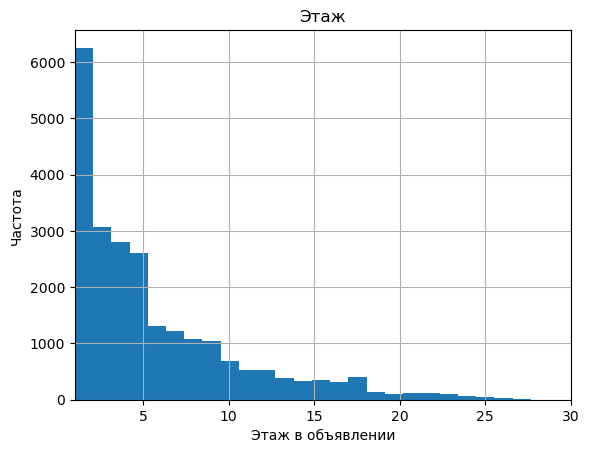

In [40]:
# этаж квартиры
df['floor'].hist(bins=30)
plt.title('Этаж')
plt.xlabel('Этаж в объявлении')
plt.ylabel('Частота')
plt.xlim(1, 30)

График имеет смещение в лево к первым пяти этажам, что закономерно, учитывая данные из прошлого графика (премущество пяти этажных домов) 

Text(0, 0.5, 'Частота')

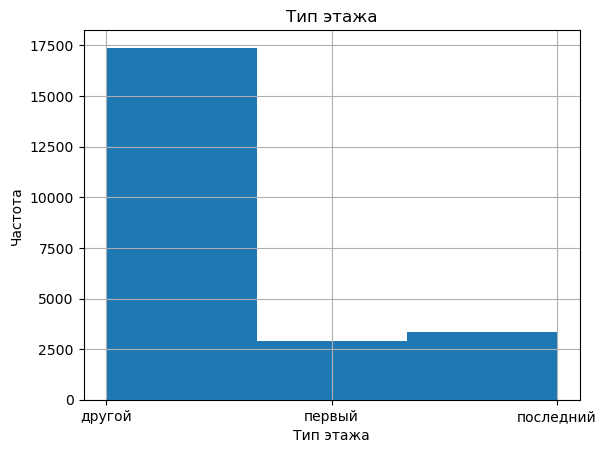

In [41]:
# Тип этажа
df['typefloor'].hist(bins=3)
plt.title('Тип этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Частота')


In [42]:
a = (df['typefloor']== 'первый').sum() + (df['typefloor'] == 'последний').sum()
print((a / len(df['typefloor'])*100).round(2),'%')


26.4 %


Доля крайних этажей составляет всего 26,4%

(0.0, 10.0)

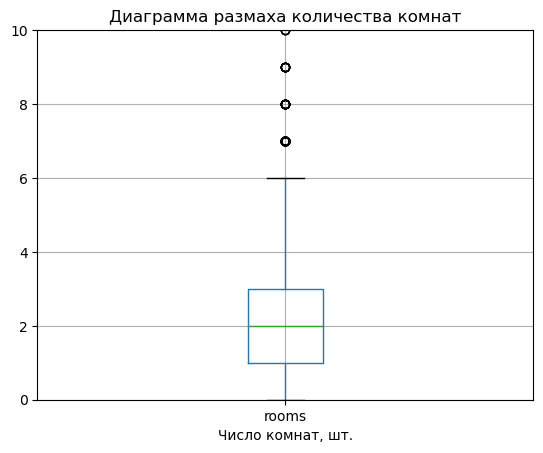

In [43]:
# количество комнат
df.boxplot(column=['rooms'])
plt.title('Диаграмма размаха количества комнат')
plt.xlabel('Число комнат, шт.')
plt.ylim(0, 10)


Text(0, 0.5, 'Частота')

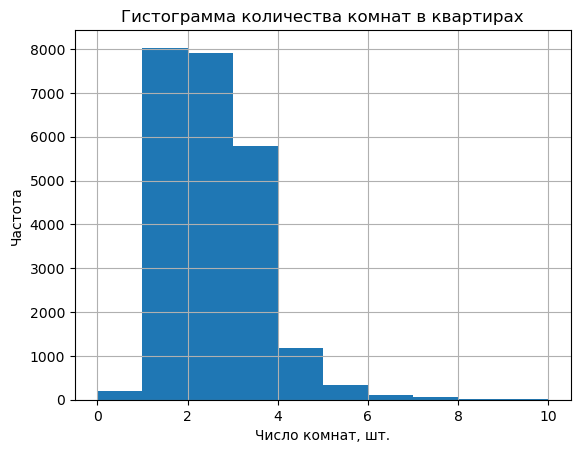

In [44]:
df['rooms'].hist(range=(0, 10))
plt.title('Гистограмма количества комнат в квартирах')
plt.xlabel('Число комнат, шт.')
plt.ylabel('Частота')

+ Данные распределены нормально ;
+ Тренд стабилен в заданном промежутке времени;
+ Основная масса квартир на рынке представленны 1-4 комнатными квартирами, есть незначительное количество квартир с большим количеством;

(0.0, 10.0)

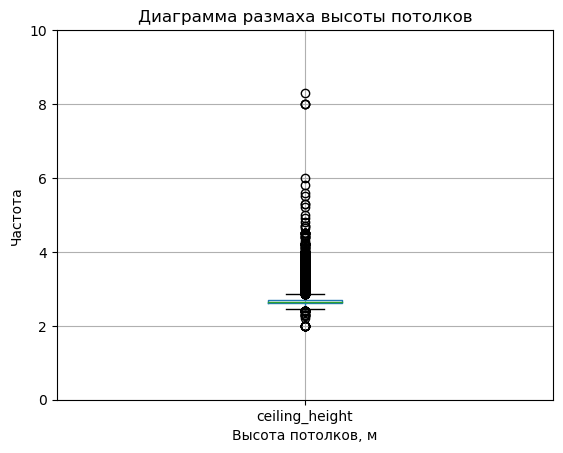

In [45]:
# Высота потолков
df.boxplot(column=['ceiling_height'])
plt.title('Диаграмма размаха высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
plt.ylim(0, 10)
#plt.ylim([0, 10])

(2.0, 4.0)

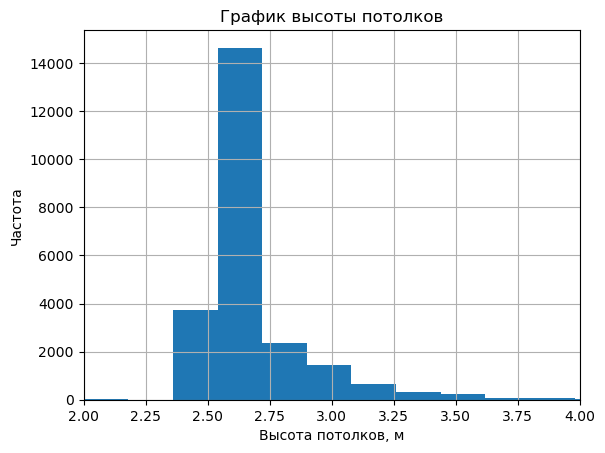

In [46]:
df['ceiling_height'].hist(bins=100)
plt.title('График высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
plt.xlim(2, 4)

+ Данные распределены нормально ;
+ Тренд ярко вырыжен в представленных данных;
+ Большаячасть квартир имеют потолок примерно 2,6 - 2,7 м, небольшая доля квартир имеют потолок до 3,6 м.  Присутствуют квартиры с огромной высотой потолка, возможно это ошибка ввода данных;

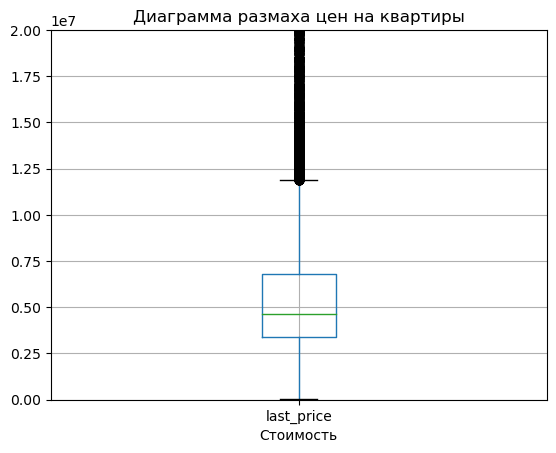

In [47]:
# цена объекта
df.boxplot(column=['last_price'])
plt.title('Диаграмма размаха цен на квартиры')
plt.xlabel('Стоимость')
plt.ylim(0, 20000000)
plt.show()

In [48]:
df['last_price'].sort_values()

8793         12190.0
14911       430000.0
17456       430000.0
16274       440000.0
17676       450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23625, dtype: float64

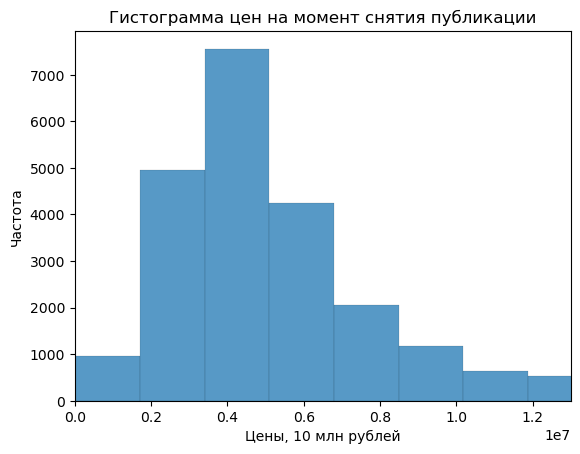

In [49]:
sns.histplot(df['last_price'], kde=False, bins=450)
plt.xlim(0, 13000000)
plt.title('Гистограмма цен на момент снятия публикации')
plt.xlabel('Цены, 10 млн рублей')
a = plt.ylabel('Частота')


+ Данные распределены нормально со смещением в положительную сторону;
+ Тренд стабилен в заданном промежутке времени;
+ 70% значений регистрировали результат от 1,8 до 7 млн. рублей, что говорит о сформировавшейся среднем диапазоне цен;
+ Имеется значительный разброс по по дорогим ценам;

<AxesSubplot:>

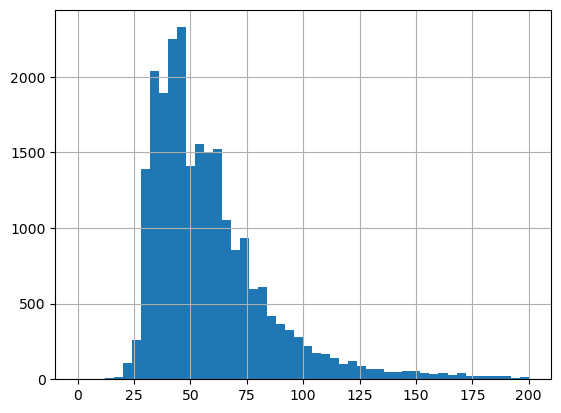

In [50]:
# общая площадь
df['total_area'].hist(range=(0, 200), bins=50)

+ Данные распределены нормально со смещением в положительную сторону;
+ Тренд стабилен в заданном промежутке времени;
+ Основная масса квартир на рынке имеют площадь от 40 до 70 метров, есть значительное количество больших квартир до 150 м;

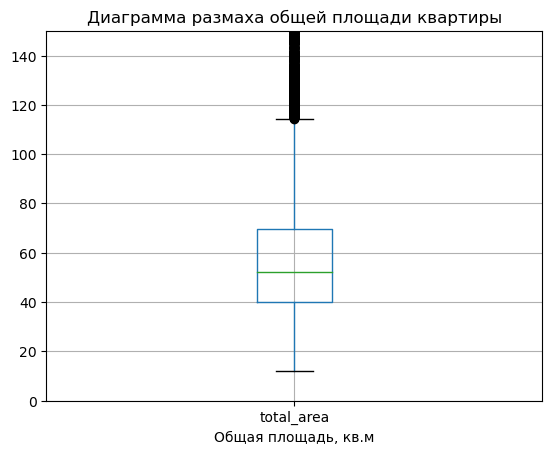

In [51]:
# построим диаграмму размаха, ограничив площадь 150 кв.м
df.boxplot(column=['total_area'])
plt.title('Диаграмма размаха общей площади квартиры')
plt.xlabel('Общая площадь, кв.м')
plt.ylim(0, 150)
plt.show()


Text(0.5, 0, 'Жилая площадь, кв.м')

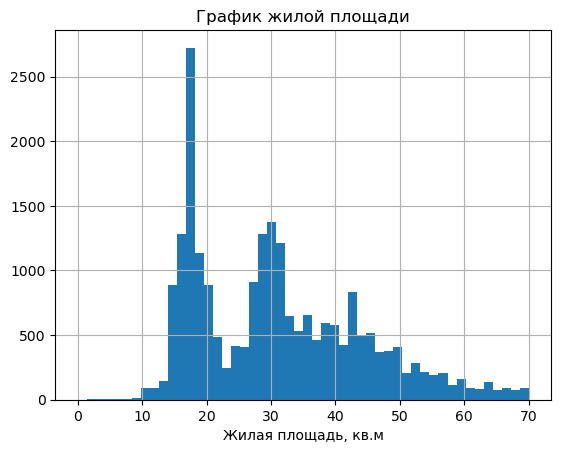

In [52]:
# жилая площадь
df['living_area'].hist(range=(0, 70), bins=50)
plt.title('График жилой площади')
plt.xlabel('Жилая площадь, кв.м')

+ Данные имеют два пика с нормальным распределением и положительный сдвиг ;
+ Тренды ярко вырыжены, видимо, существуют несколько стандартных типов квартир с 15-22 кв.м, порядка 25-35 кв.м  некоторый  менее популярные планировки от 35 до 50 и более;

Text(0.5, 0, 'Площадь кухни, кв.м')

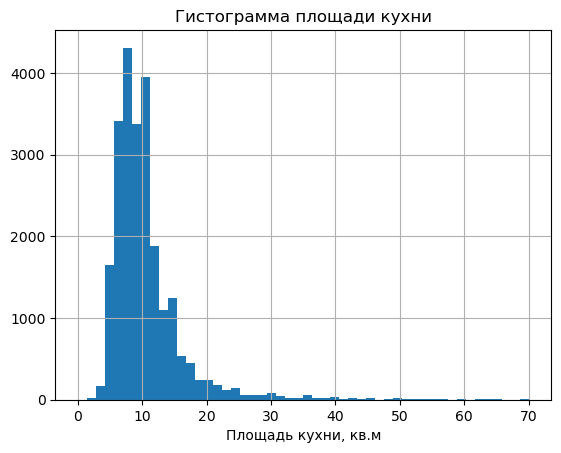

In [53]:
# площадь кухонь
df['kitchen_area'].hist(range=(0, 70), bins=50)
plt.title('Гистограмма площади кухни')
plt.xlabel('Площадь кухни, кв.м')


+ Данные распределены нормально ;
+ Тренд ярко вырыжен в заданном промежутке времени;
+ Основная масса квартир на рынке имеют имеют кухню от 7 до 13 кв.м., присутствуют квартиры с огромными кухнями, возможно это ошибка ввода данных;

<AxesSubplot:>

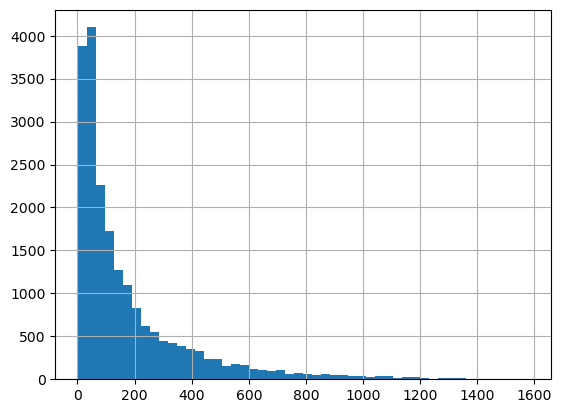

In [54]:
df['days_exposition'].hist(bins=50)

In [55]:
days_exposition_median = stats.loc['50%','days_exposition']
days_exposition_median

95.0

In [56]:
days_exposition_mean = stats.loc['mean','days_exposition']
days_exposition_mean

180.88863436982163

In [57]:
h = stats.loc['higth', 'days_exposition'] # верхняя граница квартиля распределения по количеству дней продажи
l = stats.loc['low', 'days_exposition']   # нижняя граница квартиля распределения по количеству дней продажи

<AxesSubplot:>

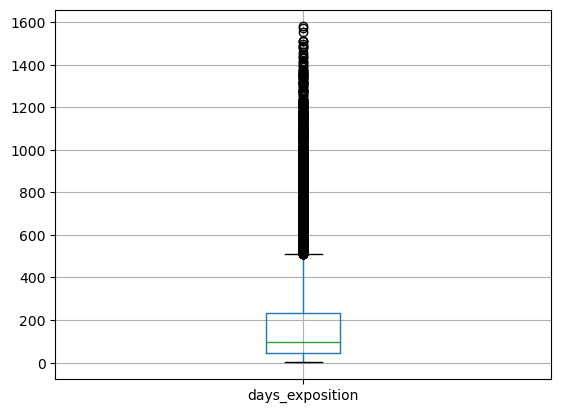

In [58]:
df.boxplot('days_exposition')

In [59]:
df.loc[df['days_exposition'] > h]  # Определение сверхдолгих продаж

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday,month,year,typefloor,center
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5,34.300000,4.0,False,...,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,14.0
3,0.0,64900000.0,159.00,2015-07-24,3.0,2.65,14,90.279661,9.0,False,...,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,7.0
16,11.0,6700000.0,82.00,2017-11-23,3.0,3.05,5,55.600000,1.0,False,...,420.0,0.0,NaN,397.0,81707,3,11,2017,первый,11.0
17,6.0,4180000.0,36.00,2016-09-09,1.0,2.65,17,16.500000,7.0,False,...,NaN,1.0,859.0,571.0,116111,4,9,2016,другой,15.0
23,11.0,2950000.0,32.00,2016-10-29,1.0,2.60,9,17.700000,9.0,False,...,517.0,1.0,190.0,615.0,92187,5,10,2016,последний,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23672,5.0,3000000.0,30.80,2016-06-08,1.0,2.65,5,16.100000,3.0,False,...,258.0,0.0,NaN,808.0,97402,2,6,2016,другой,14.0
23675,8.0,3550000.0,39.50,2016-10-03,1.0,2.65,16,19.000000,13.0,False,...,NaN,0.0,NaN,721.0,89873,0,10,2016,другой,15.0
23691,11.0,9470000.0,72.90,2016-10-13,2.0,2.75,25,40.300000,7.0,False,...,NaN,1.0,806.0,519.0,129903,3,10,2016,другой,4.0
23692,2.0,1350000.0,30.00,2017-07-07,1.0,2.65,5,17.500000,4.0,False,...,NaN,NaN,NaN,413.0,45000,4,7,2017,другой,NaN


In [60]:
df.loc[df['days_exposition'] < l]  # Определение сверхбыстрых продаж

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday,month,year,typefloor,center


Значительное количество продаж было совершено в день размещения объявления и в первые дни, что говорит о привлекательности таких предложений. В то же время присутствует сильный разброс по долгим продажам (некоторые квартиры продаются до 5 лет). 
Изучая разницу конкретных параметров быстрых и анамально долгих продаж, мы сможем выявить наиболее значимые параметры привлекательности предложений. А рассматривая варианты со средним сроком продажи, мы определим оптимальные соотношение этих параметров и цены. В итоге мы сформируем алгоритм вычесления оптимальной стоимости, а также выявим то, на что мы могли бы повлиять для увеличения ценности (например, что в первую очередь указывать в объявлении)

In [61]:
print('Необычно долгими продажами считаются выбросы, что более', stats.loc['higth', 'days_exposition'], 'дней')
print('Быстрыми будем считать те, что меньше медианы', stats.loc['50%', 'days_exposition'], 'дней' )


Необычно долгими продажами считаются выбросы, что более 375.5 дней
Быстрыми будем считать те, что меньше медианы 95.0 дней


# Следующую часть до указателя "Продолжение" можно не проверять. 
( В проект это задание не входило. Это была попытка выявить закономерность у сверхдолгих продаж.
Но буду благодарен за рекомендации)



In [62]:
# Создаем очищенную таблицу
df_day_exp=df.loc[(df['days_exposition'] < h) & (df['days_exposition'] > l)] 
#df_day_exp

In [63]:
median_normal = df_day_exp.median(numeric_only=True) # Находим медиану значений в таблице "нормальных" продаж
#median_normal

In [64]:
median_anomaly = df.loc[df['days_exposition'] > h] .median(numeric_only=True) # Находим медиану значений в таблице 
#                                                                              "аномальных" продаж
#median_anomaly

In [65]:
# Очивидно должен быть другой критерий выявления наиболее влиятельных параметров ??
#a = abs((median_normal - median_anomaly) / median_normal * 100)  
#b = a.sort_values(ascending=False).iloc[2 :-2]                
#b

# "Продолжение"

Зависимость цены от указанных параметров:
+ общей площади;
+ жилой площади;
+ площади кухни;
+ количества комнат;
+ этажа, на котором расположена квартира (первый, последний, другой);
+ даты размещения (день недели, месяц, год)

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

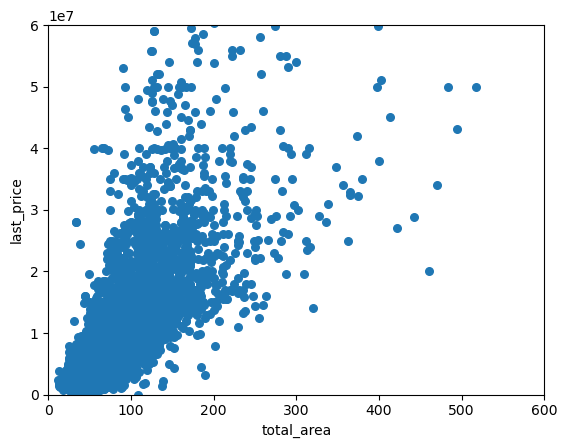

In [66]:
df.plot.scatter(x = 'total_area', y = 'last_price', xlim=[0, 600], ylim=[0, 60000000] , s = 30)  # от общей площади

В квартирах до 200м2 прослеживается линейная зависимость цены от общей площади. В квартирах с большей площадью такой зависимости нет.  

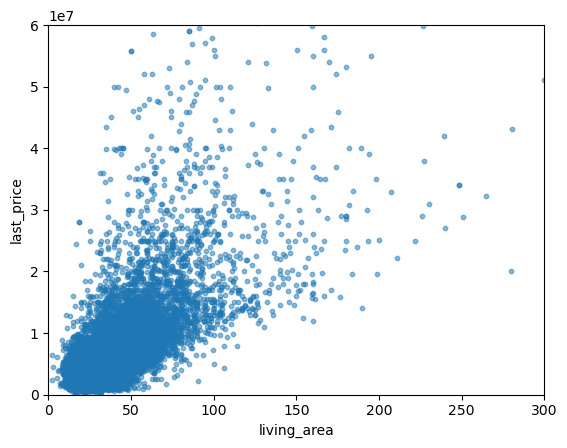

In [90]:
df.plot.scatter(x = 'living_area', y = 'last_price', xlim=[0, 300], ylim=[0, 60000000] , s = 10, alpha= 0.5) # жилой площади
plt.show()

В квартирах с жилой площадью до 100м2 прослеживается линейная зависимость цены от жилой площади. В квартирах с большей площадью такой зависимости нет.  

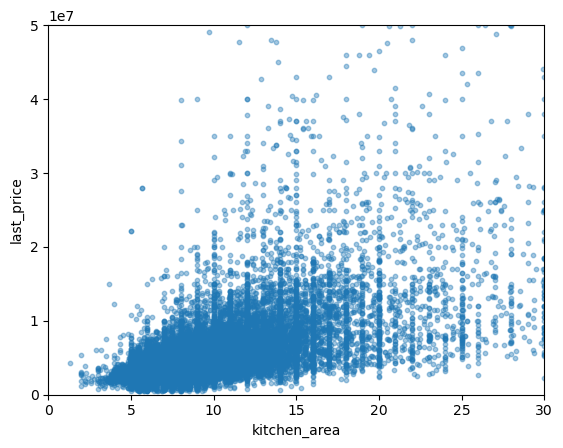

In [89]:
df.plot.scatter(x = 'kitchen_area', y = 'last_price', xlim=[0, 30], ylim=[0, 50000000] , s = 10, alpha=0.4) # от площади кухни
plt.show()

В квартирах с площадью кухни до 15м2  зависимость цены от площади кухни есть. В квартирах с большей площадью кухни такой зависимости нет.

In [69]:
df['rooms'].value_counts()

1.0     8029
2.0     7911
3.0     5794
4.0     1174
5.0      326
0.0      196
6.0      105
7.0       59
8.0       12
9.0        8
10.0       3
11.0       2
14.0       2
15.0       1
19.0       1
16.0       1
12.0       1
Name: rooms, dtype: int64

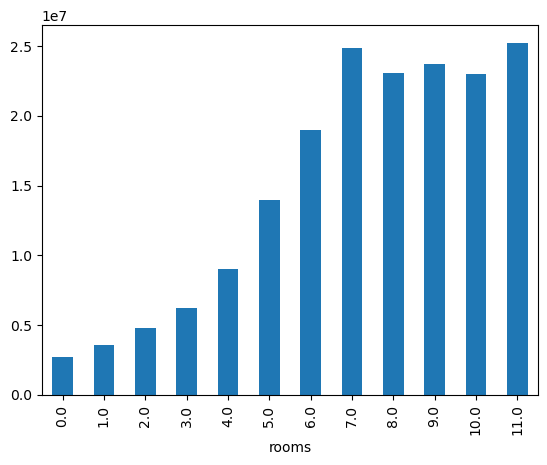

In [88]:
# от количества комнат
df1 =df.loc[df['rooms'] <12]
df1 = df1.groupby('rooms')['last_price'].median()
df1.plot.bar( x='rooms', y='last_price')
plt.show()

В квартирах до 7 комнат, наблюдается устойчивый тренд зависимости наличия дополнительной комнаты  и цены, а в квартирах с большим количеством комнат - это утверждать нельзя, потому что таких квартир слишком мало. 

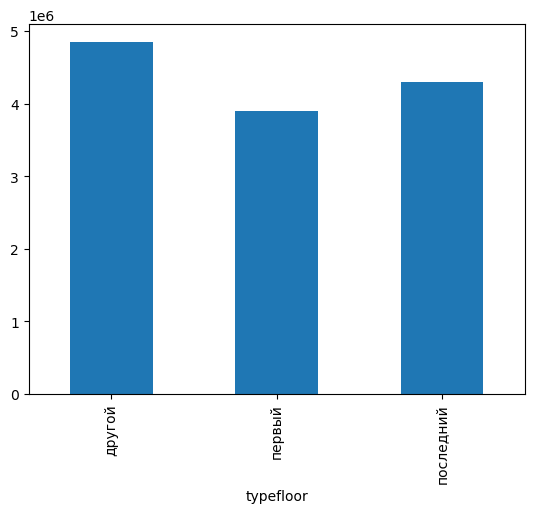

In [87]:
# от этажа, на котором расположена квартира (первый, последний, другой)
df1 = df.groupby('typefloor')['last_price'].median()
df1.plot.bar( x='typefloor', y='last_price')
plt.show()                        

Категории первых и последних этажей негативно влияет на цену.

# цена от даты размещения (день недели, месяц, год)

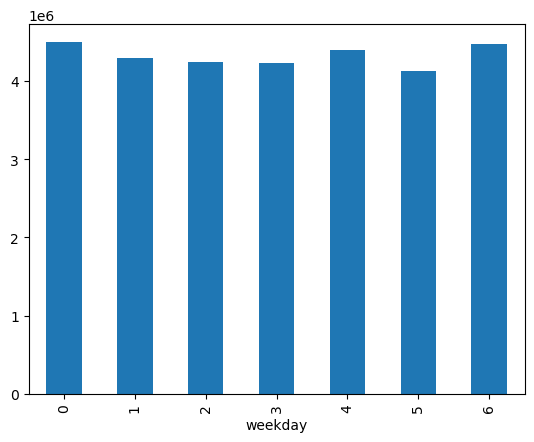

In [86]:
#  цена от дня недели
df2 = df[df['days_exposition'] < 8] # день недели важен только для быстых продаж(не более недели)
weekday = df2.groupby('weekday')['last_price'].median()
weekday.plot.bar( x='weekday', y='last_price')
plt.show()

Очевидно нет значимого влияния от тогов какой день недели было размещено объявление.

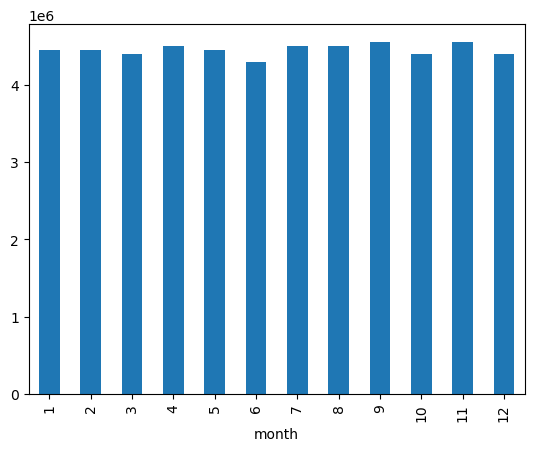

In [85]:
# цена от месяца
df2 = df[df['days_exposition'] < 366] # месяц рассматриваем в периоде года
month = df2.groupby('month')['last_price'].median()
month.plot.bar( x='month', y='last_price')
plt.show()

Цена не зависит от месяца размещения объявления

<AxesSubplot:xlabel='year'>

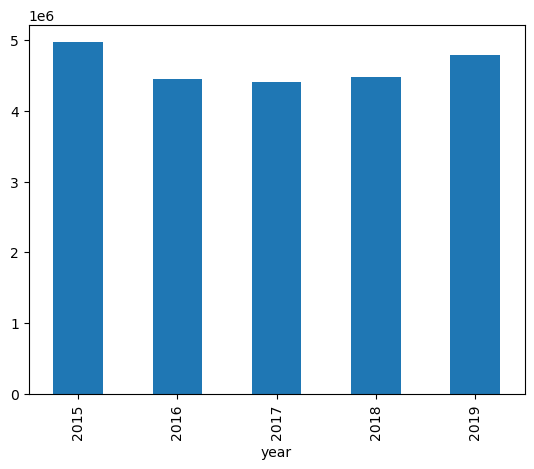

In [74]:
#  как менялась цена по годам
year = df2.groupby('year')['last_price'].median()
year.plot.bar( x='year', y='last_price')

In [75]:
(year['2015'] -year['2016']) / year['2015'] * 100

10.372608257804632

С 2015 по 2018 цена была ниже на ~ 10%. Возможно были какие-то сторонние причины обуславливающие это.

Задание
* Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [76]:

a = df.groupby('locality_name')['price_metr'].agg(['count', 'mean']).sort_values('count', ascending=False).head(10)
a['mean']

locality_name
Санкт-Петербург      114825.130451
поселок Мурино        85655.756318
поселок Шушары        78676.904545
Всеволожск            68654.007538
Пушкин               103125.373984
Колпино               75424.150888
поселок Парголово     90175.489297
Гатчина               68757.225490
деревня Кудрово       92473.086957
Выборг                58141.489451
Name: mean, dtype: float64

In [77]:
a = a.sort_values('mean', ascending=False).reset_index()
print('Самая высокая цена за метр, из десяти городов с самым большим количеством объявлений, в городе', a.loc[0, 'locality_name'])

Самая высокая цена за метр, из десяти городов с самым большим количеством объявлений, в городе Санкт-Петербург


In [78]:
print('Самая низкая цена за метр, из десяти городов с самым большим количеством объявлений, в городе', a.loc[9, 'locality_name'])

Самая низкая цена за метр, из десяти городов с самым большим количеством объявлений, в городе Выборг


Задание
* Вычислите среднюю цену каждого километра  в Санкт-Петербурге

In [79]:
df_spb = df[df['locality_name'] == 'Санкт-Петербург'] # фильтруем таблицу
df_spb = df_spb[['price_metr', 'center']]

a = df_spb.groupby('center')['price_metr'].agg('mean')  # вычисляем среднею цену по каждому км. 


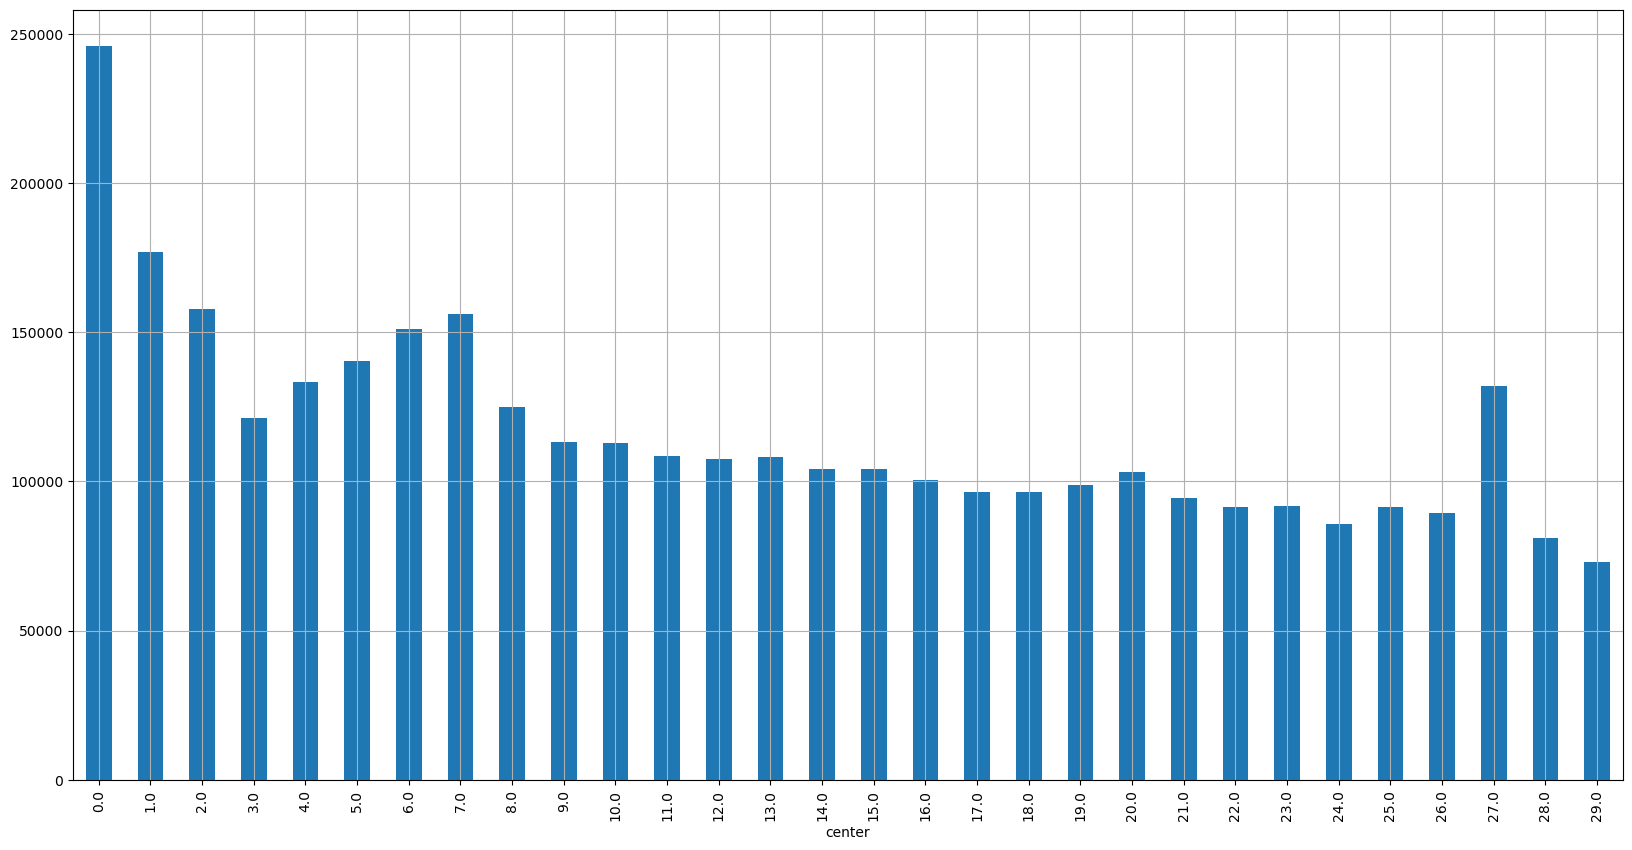

In [84]:
a.plot.bar(x='index', y='value', figsize= (20, 10), grid=True) 
plt.show()

In [81]:
df_spb.value_counts('center') # изучаем аномальные показатели

center
12.0    1605
15.0    1568
13.0    1455
14.0    1277
16.0    1264
11.0    1177
5.0      920
17.0     883
10.0     718
4.0      687
6.0      618
8.0      594
9.0      593
7.0      420
3.0      349
2.0      310
18.0     261
22.0     202
1.0      192
19.0     157
21.0     117
23.0      85
26.0      53
20.0      47
0.0       27
25.0      26
24.0      26
28.0       7
29.0       6
27.0       2
dtype: int64

Наблюдается резкое падение цены при удалении от центра до 3 км. Затем подъем на 5-7 км, очевидно там находится крупный жилой массив с хорошей инфраструктурой. Дальше небольшое плавное снижение. Значительный пик на 27 км связан с одним  объявлением с аномально высокой ценой (всего два объявления) по сути является выбросом.

####  среднестатистическая квартира
Теперь мы определили среднюю квартиру выставленную на продажу. Рассмотрев полученные характеристики, можно сделать вывод: в центре немного выше размеры квартир и цена значительно превышает среднюю по нашим общим данным, а вообще квартиры схожи по своим общим данным.

In [82]:
stats.loc['50%']

total_images                 9.00
last_price             4650000.00
total_area                  52.00
rooms                        2.00
ceiling_height               2.65
floors_total                 9.00
living_area                 30.00
floor                        4.00
kitchen_area                 9.10
balcony                      1.00
airports_nearest         26726.00
cityCenters_nearest      13098.50
parks_around3000             0.00
parks_nearest              455.00
ponds_around3000             1.00
ponds_nearest              502.00
days_exposition             95.00
Name: 50%, dtype: float64

In [83]:
# выделим факторы, которые влияют на стоимость квартиры в  Санкт-Петербурге, как наиболее показательные
spb= df.loc[df ['locality_name'] == 'Санкт-Петербург']
corr = spb[['last_price','rooms', 'floor', 'center', 'typefloor', 'total_area']].corr()
corr.style.background_gradient(cmap='coolwarm')


,last_price,rooms,floor,center,total_area
last_price,1.000000,0.372461,-0.000872,-0.259454,0.657243
rooms,0.372461,1.000000,-0.160236,-0.292660,0.758687
floor,-0.000872,-0.160236,1.000000,0.226514,-0.037078
center,-0.259454,-0.292660,0.226514,1.000000,-0.337428
total_area,0.657243,0.758687,-0.037078,-0.337428,1.000000


### Общий вывод


#### Мы исследовали данные:
+ провели чистку от нереальных данных в ячейках.(причина их появления, связана с недостаточным контролем  шаблона ввода,
+ заменили типы данных 
+ проводя анализ мы учли факт присутствия аномальных значений в ячейках, и исключили их из анализа. При этом мы не стали
 удалять строки целиком где это возмоно.
+ мы определили основные характеристики "среднестатистической" квартиры из объявлений
+ а также факторы, от которых зависит цена.

#### Среднестатистическая квартира: 
общая площадь (50-60 кв.м. это золотая середина для квартир)
число комнат (2-комнатные квартиры самые популярные)
этаж квартиры(люди стараются избегать первый и последний этаж)



#### Общая коцепция формирования цен:
* В основном квартиры продаются в первые недели, не проданные могут продаваться годами. Не дорогие квартиры продаются бысрее.
* В недорогих квартирах прослеживается отчетливый тренд роста цены от увеличения таких характеристик как площадь, количество комнат. В более дорогих значимыми являются другие характеристки.
* Цена сильно зависит населеного пукта.
* В центре квартиры дороже.
* Цена не завист от дня недели и месяца.
* Было заметное снижение цены 2016-2018 годах.

#### Причина погрешности в данных
Что касается выявленных аномалий:программистам надо разработать алгоритм, не позволяющий вводить нереальные данные, это особенно касается высоты потолков и количества комнат в квартире. Также необходимо отдельно проанализировать, что приводит к задержке на годы продажи части квартир, возможно разработать какие-то подсказки при заполнении, что поможет продавцу качественне заполнить данные и указать цену более реальную на сегодняшний день. Квартиры, которые продавались за пару дней, стоит проверить, возможно это мошеннические действия, либо продавцы передумали продавать их, тогда узнать по какой причине.